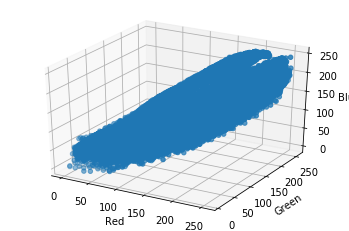

In [13]:
image_path = "image.jpg"

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

im = Image.open(image_path)
r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))

axis.scatter(r,g,b)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

# 2

In [12]:
r

[233,
 235,
 210,
 164,
 128,
 115,
 104,
 92,
 92,
 86,
 78,
 73,
 75,
 77,
 76,
 75,
 80,
 75,
 71,
 69,
 62,
 56,
 53,
 53,
 49,
 46,
 44,
 43,
 43,
 43,
 44,
 45,
 49,
 51,
 53,
 56,
 60,
 62,
 63,
 64,
 61,
 61,
 57,
 51,
 45,
 44,
 38,
 32,
 29,
 28,
 27,
 24,
 22,
 20,
 19,
 19,
 24,
 20,
 19,
 17,
 17,
 18,
 18,
 19,
 18,
 17,
 17,
 17,
 17,
 17,
 18,
 19,
 14,
 15,
 15,
 17,
 18,
 19,
 20,
 21,
 18,
 18,
 18,
 18,
 18,
 17,
 16,
 15,
 17,
 17,
 17,
 17,
 18,
 18,
 19,
 20,
 23,
 22,
 20,
 18,
 17,
 18,
 20,
 21,
 20,
 19,
 19,
 18,
 17,
 17,
 17,
 18,
 18,
 17,
 16,
 17,
 19,
 21,
 21,
 21,
 18,
 21,
 23,
 21,
 16,
 15,
 17,
 21,
 20,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 20,
 23,
 24,
 22,
 22,
 25,
 24,
 21,
 24,
 26,
 30,
 36,
 40,
 47,
 55,
 61,
 73,
 78,
 85,
 94,
 101,
 109,
 117,
 122,
 128,
 128,
 129,
 129,
 128,
 128,
 130,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 134,
 135,
 134,
 131,
 130,
 132,
 134,
 135,
 132,
 130,
 133,
 135,
 135,
 136,
 13

In [12]:
print(data)

[[[120 111 132]
  [139 130 151]
  [155 146 167]
  ...
  [120 127  73]
  [129 137  80]
  [138 143  87]]

 [[ 87  78  97]
  [111 102 123]
  [132 123 144]
  ...
  [116 125  68]
  [135 143  86]
  [148 156  99]]

 [[ 72  65  83]
  [ 96  89 107]
  [117 109 130]
  ...
  [115 126  68]
  [134 143  86]
  [146 155  98]]

 ...

 [[ 88 105  71]
  [ 93 110  76]
  [109 124  91]
  ...
  [122 158  96]
  [121 157  93]
  [121 157  93]]

 [[ 85 100  69]
  [ 96 111  80]
  [113 128  95]
  ...
  [121 157  95]
  [121 156  92]
  [120 155  89]]

 [[ 86 101  70]
  [ 98 113  82]
  [113 127  94]
  ...
  [121 155  94]
  [119 154  90]
  [118 153  87]]]


# 4

In [13]:
data.mean()

110.1658566792806

In [18]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [20]:
import cv2

# 5

Let’s first import a few libraries useful down the road and read an image-

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,transform
import cv2

imnames = ['image.jpg']

# Read collection of images with imread_collection
imlist = (io.imread_collection(imnames))
print(imlist)


['image.jpg']


Now before proceeding, we must transform all the images to a standard 256 x 256 size so there is no inconsistency in size.

In [132]:
for i in range(len(imlist)):
	# Using the skimage.transform function-- resize image (m x n x dim).
	m=transform.resize(imlist[i],(256,256,3))

What is PCA? It is a way of finding patterns in the data and once you have found these patterns, it reduces the the number of dimensions without much loss of information

in this case, we are going to treat every pixel as a data point. This means you have a ton of data points which are vectors with 3 values: R, G and B. We are then going to compute PCA on these data points. Let’s make a consolidated dataset with all these different data points. We need to make an array of all these vectors containing the RGB values from all the images.

Essentially, we want to turn the image matrix of m x n x 3 to lists of rgb values i.e. (m*n) x 3.

For visualization purposes, you can try playing with img[:,:,3] and img[0,0,3] to see a sample of the output-format we want.

In [139]:
# initializing with zeros.
res = np.zeros(shape=(1,3))

for i in range(len(imlist)):
	m=transform.resize(imlist[i],(256,256,3))
    
	# Reshape the matrix to a list of rgb values.
	arr=m.reshape((256*256),3)
    
	# concatenate the vectors for every image with the existing list.
	res = np.concatenate((res,arr),axis=0)

# delete initial zeros' row
res = np.delete(res, (0), axis=0)
# print list of vectors - 3 columns (rgb)
print(res)

[[0.891 0.841 0.704]
 [0.681 0.64  0.504]
 [0.469 0.428 0.311]
 ...
 [0.193 0.27  0.293]
 [0.191 0.266 0.293]
 [0.192 0.267 0.294]]


Subtract the mean. For PCA to work properly, you must subtract the mean from each of the dimensions.

In [134]:
#avg 
m = res.mean(axis = 0)
m

array([0.357, 0.36 , 0.312])

In [135]:
res = res - m
res

array([[ 0.534,  0.48 ,  0.391],
       [ 0.323,  0.28 ,  0.192],
       [ 0.112,  0.068, -0.001],
       ...,
       [-0.164, -0.091, -0.019],
       [-0.166, -0.094, -0.019],
       [-0.165, -0.094, -0.018]])

 Calculate the covariance matrix. Since the data is 3 dimensional, the cov matrix will be 3x3

In [136]:
R = np.cov(res, rowvar=False)
print("covariance:")
R

covariance:


array([[0.06 , 0.045, 0.029],
       [0.045, 0.041, 0.028],
       [0.029, 0.028, 0.021]])

In [137]:
Var = np.var(res,axis=None)
print("variance:",Var)

variance: 0.04055147333682203


There seems to be very weak covariance of the pixel intensities in the non-diagonal elements. Interesting concept point- Because the covariance of the ith random variable with itself is simply that random variable’s variance, each element on the principal diagonal of the covariance matrix is just the variance of each of the elements in the vector. however, the current example is only for sample purposes and the results would be better with more colorful images.

Since the cov matrix is a square matrix, this can be done. Brief recap: Geometrically, an eigenvector corresponding to a real, nonzero eigenvalue points in a direction that is stretched by the transformation and the eigenvalue is the factor by which it is stretched. If the eigenvalue is negative, the direction is reversed.

Now, the eigenvector with the highest value is also the principal component of the dataset. For example if your data was most widely spread across the x-axis, the eigenvector representing the x-axis would be your principal component. Once the eigenvectors are found, we shall sort them from the highest to lowest. Now we can ignore the lower eigenvalues, since the loss of information will be small (they are hardly important components and so the variations along those components in the data will be very small). In this way, by leaving out some components your final data will have lesser components than the original dataset. Voila! this is how dimensionality reduction is performed.

In [138]:
from numpy import linalg as LA
from numpy import arange

evals, evecs = LA.eigh(R)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]

# sort eigenvectors according to same index
evals = evals[idx]

# select the best 3 eigenvectors (3 is desired dimension
# of rescaled data array)
evecs = evecs[:, :3]

# make a matrix with the three eigenvectors as its columns.
evecs_mat = np.column_stack((evecs))


Once we have chosen the eigenvectors or the components that we wish to keep in our data and formed a feature vector- we simply take the transpose of the vector and multiply it to the left of the original dataset, transposed. you can work out this matrix math by yourself.

what will this give us? It will give us the original data solely in terms of the components we chose. Further, the eigenvectors are always perpendicular to each other- to express the data in the most efficient manner.

In [141]:
# carry out the transformation on the data using eigenvectors
# and return the re-scaled data, eigenvalues, and eigenvectors
m = np.dot(evecs.T, res.T).T

We have now transformed our data so that it is expressed in terms of the patterns between them where patterns are lines that most closely describe the relationships between the data. In the case of transformations by eigenvalues, we have simply altered the magnitude or ‘level of stretch’ (visually speaking) of these eigenvectors without changing its direction.

Now, having performed PCA on the pixel values, we need to add multiples of the found principal components with magnitudes proportional to the corresponding eigenvalues times a random variable drawn from a Gaussian distribution with mean zero and standard deviation 0.1. Ok! Let’s keep rowing!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


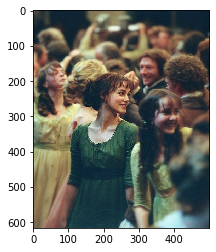

In [128]:
def data_aug(img = img):
	mu = 0
	sigma = 0.1
	feature_vec=np.matrix(evecs_mat)

	# 3 x 1 scaled eigenvalue matrix
	se = np.zeros((3,1))
	se[0][0] = np.random.normal(mu, sigma)*evals[0]
	se[1][0] = np.random.normal(mu, sigma)*evals[1]
	se[2][0] = np.random.normal(mu, sigma)*evals[2]
	se = np.matrix(se)
	val = feature_vec*se

	# Parse through every pixel value.
	for i in arange(img.shape[0]):
		for j in arange(img.shape[1]):
			# Parse through every dimension.
			for k in arange(img.shape[2]):
				img[i,j,k] = float(img[i,j,k]) + float(val[k])

# Calling function for  image.
# Re-scaling from 0-255 to 0-1.
img = imlist[0]/255.0
data_aug(img)
plt.imshow(img)


# Putting it all together:

[[0.06  0.045 0.029]
 [0.045 0.041 0.028]
 [0.029 0.028 0.021]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


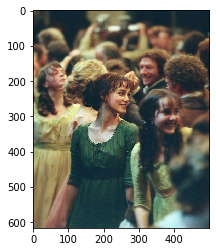

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,transform
%matplotlib inline

def data_aug(img = img):
	mu = 0
	sigma = 0.1
	feature_vec=np.matrix(evecs_mat)

	# 3 x 1 scaled eigenvalue matrix
	se = np.zeros((3,1))
	se[0][0] = np.random.normal(mu, sigma)*evals[0]
	se[1][0] = np.random.normal(mu, sigma)*evals[1]
	se[2][0] = np.random.normal(mu, sigma)*evals[2]
	se = np.matrix(se)
	val = feature_vec*se

	# Parse through every pixel value.
	for i in arange(img.shape[0]):
		for j in arange(img.shape[1]):
			# Parse through every dimension.
			for k in arange(img.shape[2]):
				img[i,j,k] = float(img[i,j,k]) + float(val[k])

imnames = ['image.jpg']
#load list of images
imlist = (io.imread_collection(imnames))

res = np.zeros(shape=(1,3))
for i in range(len(imlist)):
	# re-size all images to 256 x 256 x 3
	m=transform.resize(imlist[i],(256,256,3))
	# re-shape to make list of RGB vectors.
	arr=m.reshape((256*256),3)
	# consolidate RGB vectors of all images
	res = np.concatenate((res,arr),axis=0)
res = np.delete(res, (0), axis=0)

# subtracting the mean from each dimension
m = res.mean(axis = 0)
res = res - m

R = np.cov(res, rowvar=False)
print(R)

from numpy import linalg as LA
evals, evecs = LA.eigh(R)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
# sort eigenvectors according to same index

evals = evals[idx]
# select the first 3 eigenvectors (3 is desired dimension
# of rescaled data array)

evecs = evecs[:, :3]
# carry out the transformation on the data using eigenvectors
# and return the re-scaled data, eigenvalues, and eigenvectors
m = np.dot(evecs.T, res.T).T

# perturbing color in image[0]
# re-scaling from 0-1
img = imlist[0]/255.0
data_aug(img)
plt.imshow(img)
